In [119]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sn


In [120]:
os.getcwd()

'C:\\Users\\Aneesh'

In [121]:
df=pd.read_csv('Data.csv', encoding = "ISO-8859-1")

In [122]:
df.head()
#the Label variable will be 1 if the DJIA stayed the same or rose on that date or 0 if the DJIA fell on that date.

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,1/3/2000,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,1/4/2000,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,1/5/2000,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,1/6/2000,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,1/7/2000,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [123]:
print(df.dtypes)

Date     object
Label     int64
Top1     object
Top2     object
Top3     object
Top4     object
Top5     object
Top6     object
Top7     object
Top8     object
Top9     object
Top10    object
Top11    object
Top12    object
Top13    object
Top14    object
Top15    object
Top16    object
Top17    object
Top18    object
Top19    object
Top20    object
Top21    object
Top22    object
Top23    object
Top24    object
Top25    object
dtype: object


In [124]:
#4101 rows with 27 columns
print(df.shape)

(4101, 27)


In [125]:
# Counting missing values
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [126]:
#Replacing missing values with a blank
df = df.replace(np.nan, ' ', regex=True)

#double check
df.isnull().sum().sum()


0

In [127]:
#Adding a column 'Combined' which contains all the top 25 headlines in one cell for each row.
df['Combined']=df.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)),axis=1)

In [128]:
up = df[df['Label']==1]
down = df[df['Label']==0]
print(len(up)/len(df))

0.5281638624725676


In [129]:
def to_words(content):
    letters = re.sub("[^a-zA-Z]"," ", content)
    words = letters.lower().split()
    stops = set(stopwords.words("english"))
    mwords = [w for w in words if not w in stops]
    return(" ".join( mwords))
up_word = []
down_word = []
for word in up['Combined']:
    up_word.append(to_words(word))

for word in down['Combined']:
    down_word.append(to_words(word))

In [130]:
down_word[0:5]

['hindrance operations extracts leaked reports scorecard hughes instant hit buoys blues jack gets skates ice cold alex chaos maracana builds united depleted leicester prevail elliott spoils everton party hungry spurs sense rich pickings gunners wide easy target derby raise glass strupar debut double southgate strikes leeds pay penalty hammers hand robson youthful lesson saints party like wear wolves turned lambs stump mike catches testy gough taunt langer escapes hit flintoff injury piles woe england hunters threaten jospin new battle somme kohl successor drawn scandal difference men women sara denver nurse turned solicitor diana landmine crusade put tories panic yeltsin resignation caught opposition flat footed russian roulette sold recovering title',
 'scorecard best lake scene leader german sleaze inquiry cheerio boyo main recommendations cubie killed fees cubie killed fees cubie killed fees hopkins furious foster lack hannibal appetite cubie killed fees tale two tails say like like

In [131]:
wordcloud_down = WordCloud(background_color='black',
                          width=3000,
                          height=2500
                          ).generate(down_word[0])

In [132]:
matplotlib.rcParams["figure.figsize"] = "8, 8"

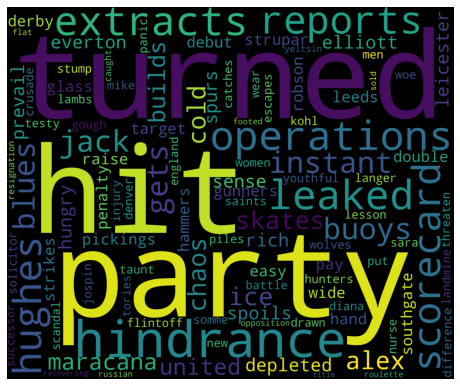

In [133]:
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_down)
plt.axis('off')
plt.show()

In [134]:
wordcloud_up = WordCloud(background_color='white',
                         width=3000,
                         height=2500
                         ).generate(up_word[0])

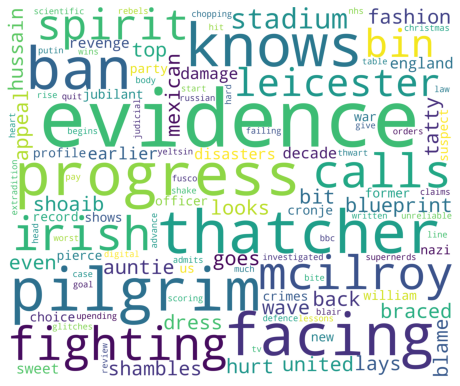

In [135]:
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_up)
plt.axis('off')
plt.show()

In [136]:
#Splitting data into train and test
train, test = train_test_split(df,train_size=0.8,test_size=0.2,random_state=1)

In [137]:
train.shape

(3280, 28)

In [138]:
test.shape

(821, 28)

In [139]:
#All headlines in a row combined for train dataset 
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [140]:
#All headlines in a row combined for test dataset
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [141]:
trainheadlines[0]

'Rupert Murdochs Sky News acknowledges hacking emails, says it was in public interest  Almost 500 websites in China have been defaced in a large-scale attack staged by the Anonymous hacking group. Greece: Six of the country\'s universities say they face immediate closure after the recent bondswap reduced their assets to zero. UK\'s Sky News: We hacked in the public interest Egypt sends Christian student to jail for insulting Islam Retiree\'s Suicide Triggers Riots in Greece  Millionaire\'s daughter convicted for role as driver for a gang of looters during London riots Gas Prices Hit Record High in Canada - Expected to be higher by end of April.  Crude shortage is said not to be the problem. Japan nuke plant leaks radioactive water again Jim Marshall (Founder of Marshall Amps) died today at 88  New report on human trafficking: 2.4 million people are being traded at any one time. 80% of those people are trafficked for sexual exploitation, while 17% are traded to perform forced labor. 2 o

In [142]:
#Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.
#n=1 for this n-gram model
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)

(3280, 44084)


In [143]:
print(basicvectorizer.get_feature_names())

['00', '000', '00021', '000bpd', '000ft', '000kg', '000km2', '000m', '000mph', '000rmb', '000s', '000th', '000x', '001', '004', '007', '00am', '00pm', '01', '017', '018', '02', '020', '0220', '0221', '03', '035', '037', '04', '045', '04am', '05', '06', '07', '077', '08', '080', '089', '09', '0900', '0930', '094', '10', '100', '1000', '10000', '1000km', '1000s', '1000th', '1006', '100bn', '100ds', '100ft', '100k', '100km', '100m', '100mb', '100mil', '100mw', '100s', '100th', '100x', '101', '101st', '102', '103', '1030', '1038', '104', '1044', '104m', '105', '1050', '1054', '106', '1061c', '106fm', '106m', '107', '107d', '108', '109', '10bars', '10bn', '10cm', '10in', '10k', '10km', '10m', '10million', '10s', '10th', '10x', '10yr', '11', '110', '110m', '111', '111m', '112', '113', '114', '1142', '115', '115m', '116', '116bn', '117', '117k', '117m', '118', '119', '119th', '11am', '11b', '11bn', '11c', '11g', '11m', '11s', '11th', '11yo', '12', '120', '1200', '120bn', '120ft', '120m', '121

In [144]:
basictrain[0]

<1x44084 sparse matrix of type '<class 'numpy.int64'>'
	with 301 stored elements in Compressed Sparse Row format>

In [145]:
print(basictrain.toarray())

[[0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [146]:
#We run 3 n-gram models using Random forest classifier and Logistic regression both. n=1, 2 and 3

#n=1, random forest
RFmodel1=RandomForestClassifier(n_estimators=200,criterion='entropy')
RFmodel1=RFmodel1.fit(basictrain,train['Label'])

In [147]:

basictest = basicvectorizer.transform(testheadlines)
preds1 = RFmodel1.predict(basictest)
acc1=accuracy_score(test['Label'], preds1)

In [148]:
matrix=confusion_matrix(test['Label'],preds1)
print(matrix)
score=accuracy_score(test['Label'],preds1)
print(score)
report=classification_report(test['Label'],preds1)
print(report)

[[116 246]
 [156 303]]
0.510353227771011
              precision    recall  f1-score   support

           0       0.43      0.32      0.37       362
           1       0.55      0.66      0.60       459

    accuracy                           0.51       821
   macro avg       0.49      0.49      0.48       821
weighted avg       0.50      0.51      0.50       821



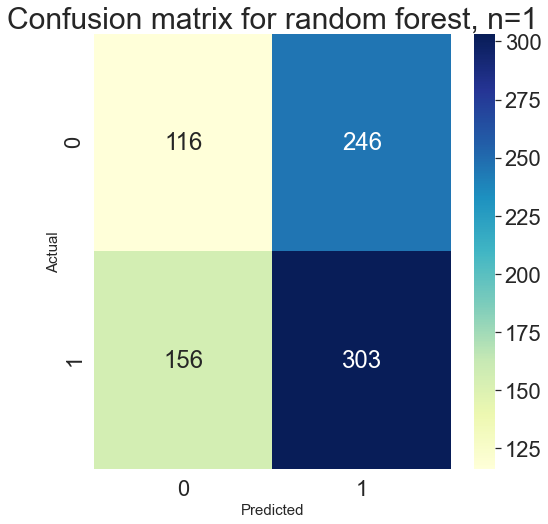

In [149]:
sn.set(font_scale=2.0)
ax= sn.heatmap(matrix, cmap = "YlGnBu",annot=True, fmt="d")

plt.title('Confusion matrix for random forest, n=1',fontsize=30)
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [150]:
#n=1,logistic regression
LRmodel1 = LogisticRegression(max_iter=1000)
LRmodel1 = LRmodel1.fit(basictrain, train["Label"])

In [151]:
basictest = basicvectorizer.transform(testheadlines)
preds2 = LRmodel1.predict(basictest)
acc2=accuracy_score(test['Label'], preds2)


In [152]:
matrix=confusion_matrix(test['Label'],preds2)
print(matrix)
score=accuracy_score(test['Label'],preds2)
print(score)
report=classification_report(test['Label'],preds2)
print(report)

[[171 191]
 [206 253]]
0.5164433617539586
              precision    recall  f1-score   support

           0       0.45      0.47      0.46       362
           1       0.57      0.55      0.56       459

    accuracy                           0.52       821
   macro avg       0.51      0.51      0.51       821
weighted avg       0.52      0.52      0.52       821



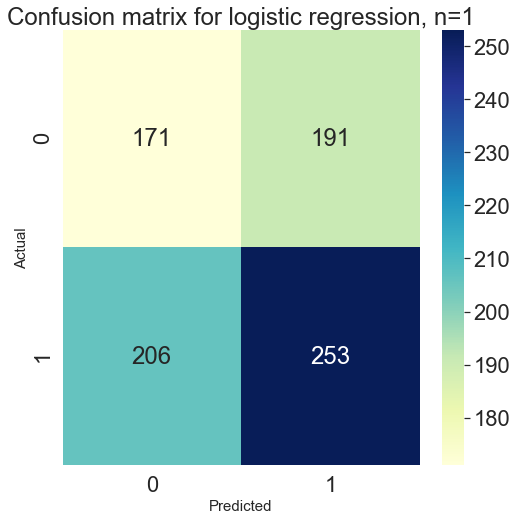

In [153]:
ax= sn.heatmap(matrix, cmap = "YlGnBu",annot=True, fmt="d")

plt.title('Confusion matrix for logistic regression, n=1')
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [154]:
# Top 5 positive co-efficients
basicwords = basicvectorizer.get_feature_names()
basiccoeffs = LRmodel1.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(5)

,Word,Coefficient
1552,abroad,0.714692
33098,resolution,0.697633
41906,verdict,0.675517
19072,hospital,0.615658
27440,northern,0.615633


In [155]:
# Top 5 negative co-efficients
coeffdf.tail(5)

,Word,Coefficient
200,15,-0.631947
3918,avoid,-0.657068
38733,system,-0.695755
14345,extra,-0.699330
39191,tell,-0.701835


In [156]:
#n=2
advancedvectorizer = TfidfVectorizer( min_df=0.03, max_df=0.97, max_features = 200000, ngram_range = (2, 2))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)

In [157]:
print(advancedtrain.shape)

(3280, 266)


In [158]:
print(advancedvectorizer.get_feature_names())

['000 people', 'about the', 'access to', 'according to', 'accused of', 'across the', 'after being', 'after the', 'against the', 'ahead of', 'al jazeera', 'al qaeda', 'all the', 'and other', 'and the', 'are being', 'are not', 'around the', 'arrested in', 'as the', 'at least', 'at the', 'attack on', 'attempt to', 'back to', 'ban on', 'bbc news', 'be the', 'because of', 'by the', 'call for', 'calls for', 'can be', 'charged with', 'city of', 'climate change', 'could be', 'country diary', 'david cameron', 'dead in', 'due to', 'during the', 'edward snowden', 'end of', 'european union', 'first time', 'for his', 'for the', 'forced to', 'found in', 'from the', 'go to', 'going to', 'guilty of', 'has been', 'have been', 'have to', 'he was', 'head of', 'hit by', 'hong kong', 'horse racing', 'how the', 'how to', 'human rights', 'hundreds of', 'if they', 'if you', 'in afghanistan', 'in an', 'in brief', 'in china', 'in egypt', 'in europe', 'in gaza', 'in germany', 'in his', 'in india', 'in iraq', 'in

In [159]:
#Random forest, n=2
RFmodel2=RandomForestClassifier(n_estimators=500,criterion='entropy')
RFmodel2=RFmodel2.fit(advancedtrain,train['Label'])

In [160]:
advancedtest = advancedvectorizer.transform(testheadlines)
preds3 = RFmodel2.predict(advancedtest)
acc3=accuracy_score(test['Label'], preds3)

In [161]:
matrix=confusion_matrix(test['Label'],preds3)
print(matrix)
score=accuracy_score(test['Label'],preds3)
print(score)
report=classification_report(test['Label'],preds3)
print(report)

[[145 217]
 [171 288]]
0.5274056029232643
              precision    recall  f1-score   support

           0       0.46      0.40      0.43       362
           1       0.57      0.63      0.60       459

    accuracy                           0.53       821
   macro avg       0.51      0.51      0.51       821
weighted avg       0.52      0.53      0.52       821



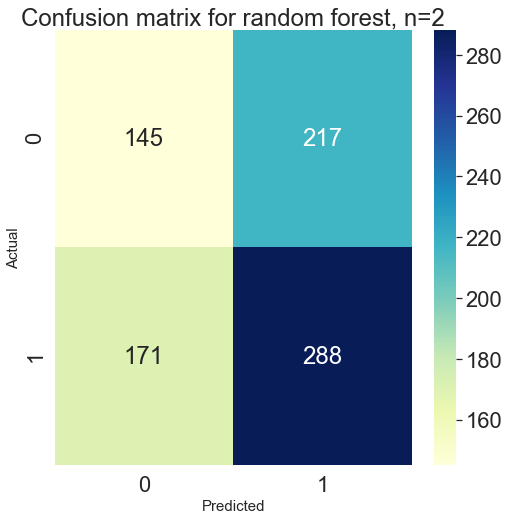

In [162]:
ax= sn.heatmap(matrix, cmap = "YlGnBu",annot=True, fmt="d")

plt.title('Confusion matrix for random forest, n=2')
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [163]:
#n=2, Logistic regression
LRmodel2 = LogisticRegression(max_iter=1000)
LRmodel2 = LRmodel2.fit(advancedtrain, train["Label"])


advancedtest = advancedvectorizer.transform(testheadlines)
preds4 = LRmodel2.predict(advancedtest)
acc4=accuracy_score(test['Label'], preds4)







In [164]:
matrix=confusion_matrix(test['Label'],preds4)
print(matrix)
score=accuracy_score(test['Label'],preds4)
print(score)
report=classification_report(test['Label'],preds4)
print(report)

[[142 220]
 [185 274]]
0.5066991473812423
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       362
           1       0.55      0.60      0.58       459

    accuracy                           0.51       821
   macro avg       0.49      0.49      0.49       821
weighted avg       0.50      0.51      0.50       821



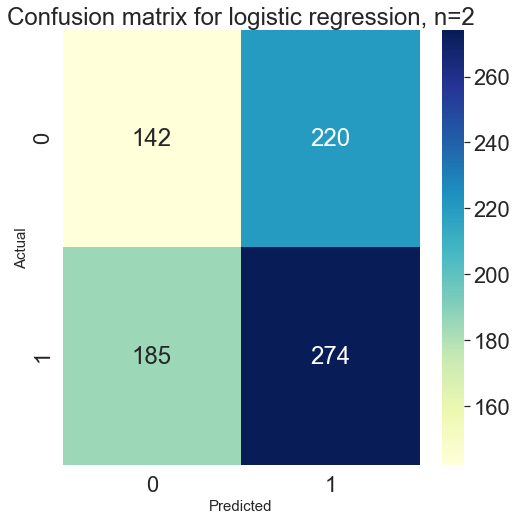

In [165]:
ax= sn.heatmap(matrix, cmap = "YlGnBu",annot=True, fmt="d")

plt.title('Confusion matrix for logistic regression, n=2')
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [166]:
advancedwords = advancedvectorizer.get_feature_names()
advancedcoeffs = LRmodel2.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : advancedwords, 
                        'Coefficient' : advancedcoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(5)

,Word,Coefficient
13,and other,1.239008
49,found in,1.185589
263,year old,1.140398
214,to build,1.083737
98,it has,1.048133


In [167]:
coeffdf.tail(5)

,Word,Coefficient
101,it will,-1.084673
264,years ago,-1.111348
85,in russia,-1.168715
244,up the,-1.227317
138,on monday,-1.272808


In [168]:
#n=3
advancedvectorizer2 = TfidfVectorizer( min_df=0.004, max_df=0.996, max_features = 200000, ngram_range = (3, 3))
advancedtrain2 = advancedvectorizer2.fit_transform(trainheadlines)

In [169]:
print(advancedtrain2.shape)

(3280, 747)


In [170]:
print(advancedvectorizer2.get_feature_names())

['000 people have', '000 year old', '11 year old', '12 year old', '13 year old', '14 year old', '15 year old', '16 year old', '17 year old', '2022 world cup', 'access to the', 'according to new', 'according to report', 'according to the', 'across the country', 'ahead of the', 'al jazeera english', 'albert hall london', 'an act of', 'an attack on', 'an attempt to', 'an effort to', 'an end to', 'and forced to', 'and human rights', 'and south korea', 'and that the', 'and the united', 'and the us', 'and the world', 'anniversary of the', 'are expected to', 'are trying to', 'around the world', 'as long as', 'as many as', 'as much as', 'as one of', 'as part of', 'as result of', 'as well as', 'as young as', 'at least 10', 'at risk of', 'at the end', 'at the top', 'at the united', 'attack on the', 'aung san suu', 'australian prime minister', 'back in the', 'back to the', 'ban ki moon', 'bank of england', 'bank of scotland', 'bashar al assad', 'be able to', 'be allowed to', 'be banned from', 'be

In [171]:
#random forest for n=3
RFmodel3=RandomForestClassifier(n_estimators=800,criterion='entropy')
RFmodel3=RFmodel3.fit(advancedtrain2,train['Label'])

In [172]:
advancedtest2 = advancedvectorizer2.transform(testheadlines)
preds5 = RFmodel3.predict(advancedtest2)
acc5=accuracy_score(test['Label'], preds5)

In [173]:
matrix=confusion_matrix(test['Label'],preds5)
print(matrix)
score=accuracy_score(test['Label'],preds5)
print(score)
report=classification_report(test['Label'],preds5)
print(report)

[[184 178]
 [249 210]]
0.47990255785627284
              precision    recall  f1-score   support

           0       0.42      0.51      0.46       362
           1       0.54      0.46      0.50       459

    accuracy                           0.48       821
   macro avg       0.48      0.48      0.48       821
weighted avg       0.49      0.48      0.48       821



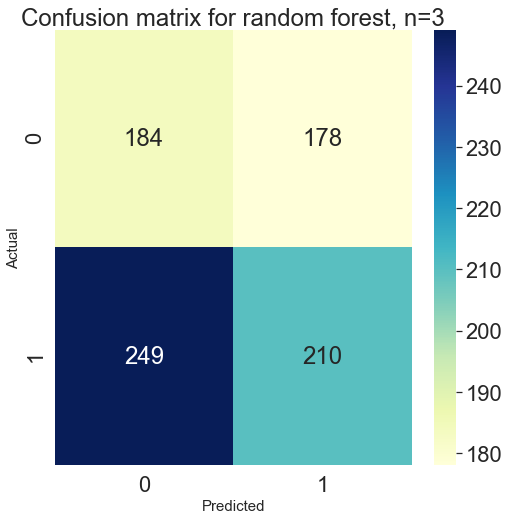

In [174]:
ax= sn.heatmap(matrix, cmap = "YlGnBu",annot=True, fmt="d")

plt.title('Confusion matrix for random forest, n=3')
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [175]:
#logistic regression for n=3
LRmodel3 = LogisticRegression(max_iter=1000)
LRmodel3 = LRmodel3.fit(advancedtrain2, train["Label"])

In [176]:
advancedtest2 = advancedvectorizer2.transform(testheadlines)
preds6 = LRmodel3.predict(advancedtest2)
acc6=accuracy_score(test['Label'], preds6)

In [177]:
matrix=confusion_matrix(test['Label'],preds6)
print(matrix)
score=accuracy_score(test['Label'],preds6)
print(score)
report=classification_report(test['Label'],preds6)
print(report)

[[170 192]
 [227 232]]
0.48964677222898906
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       362
           1       0.55      0.51      0.53       459

    accuracy                           0.49       821
   macro avg       0.49      0.49      0.49       821
weighted avg       0.49      0.49      0.49       821



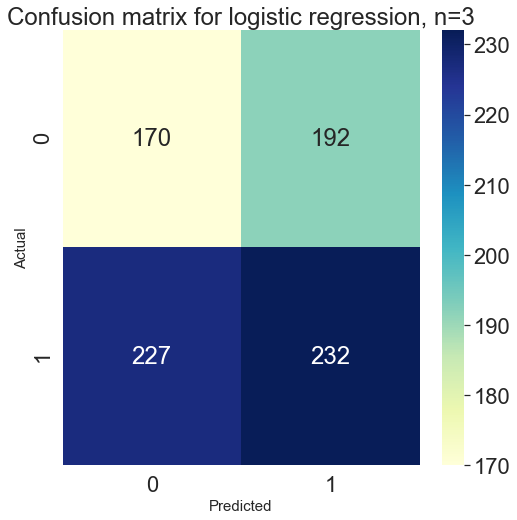

In [178]:
ax= sn.heatmap(matrix, cmap = "YlGnBu",annot=True, fmt="d")

plt.title('Confusion matrix for logistic regression, n=3')
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [179]:
advancedwords2 = advancedvectorizer2.get_feature_names()
advancedcoeffs2 = LRmodel3.coef_.tolist()[0]
coeffdf2 = pd.DataFrame({'Word' : advancedwords2, 
                        'Coefficient' : advancedcoeffs2})
coeffdf2 = coeffdf2.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf2.head(5)

,Word,Coefficient
3,12 year old,1.239925
248,in west bank,1.221825
116,first time since,1.212255
631,this is not,1.209642
588,the start of,1.129639


In [180]:
coeffdf2.tail(5)

,Word,Coefficient
349,of climate change,-1.063907
98,dark side of,-1.093729
350,of human rights,-1.146323
690,to try to,-1.161424
85,child sex abuse,-1.273281


In [181]:
#Accuracy of the model goes up when we switch from unigram to bigram model. But it decreases 
#when going from n=2 to n=3(bi-gram to tri-gram)